# Predicting disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting someone's disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features & Modelling
5. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict it's disease ?

## 2. Data

We are using Dataset from Kaggle : https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning

## 3. Evaluation

> If we can reach 95% accuracy at predicting patient's disease during the proof of concept, we'll pursue the project.

## 4. Features & Modelling

In our dataset, there are 133 Columns and 132 of these columns are symptoms that a person experiences and last column is the prognosis. We will use these features to train our model.

## 5. Experimentation

At last, we do experiments on models and pick the best one.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

In [3]:
# Reading training dataset
df = pd.read_csv('dataset/Training.csv')

# Checking whether the dataset is balanced or not
df["prognosis"].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [4]:
# Visualizing the dataset
df.head()

# Removing the last column as it's useless
df.drop('Unnamed: 133', axis=1, inplace=True)

In [5]:
# Now our data is clean & we are good to go : )
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


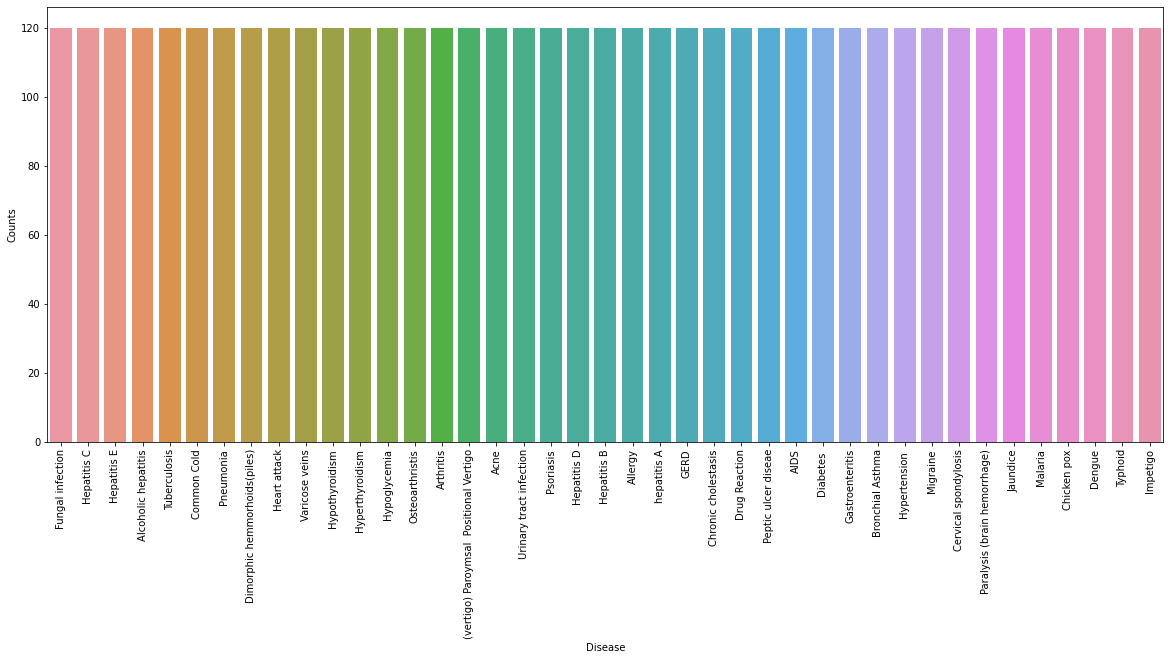

In [6]:
disease_counts = df["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (20,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [7]:
# Encoding the target value(object) into numerical value via LabelEncoder() 
encoder = LabelEncoder()
df["prognosis"] = encoder.fit_transform(df["prognosis"])

In [8]:
# Spliting Data into X and Y
X = df.drop('prognosis', axis=1)
y = df['prognosis']

In [9]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [10]:
y

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int32

In [11]:
X.shape, y.shape

((4920, 132), (4920,))

In [12]:
# Splitting Data into training and test
X_train, X_test, y_train, y_test =train_test_split(
X, y, test_size = 0.2, random_state = 42)

print(f'Train: {X_train.shape}, {y_train.shape}')
print(f'Test: {X_test.shape}, {y_test.shape}')

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [13]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10,
                            n_jobs = -1,
                            scoring = cv_scoring)
    print("--"*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

------------------------------------------------------------
SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
------------------------------------------------------------
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
------------------------------------------------------------
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


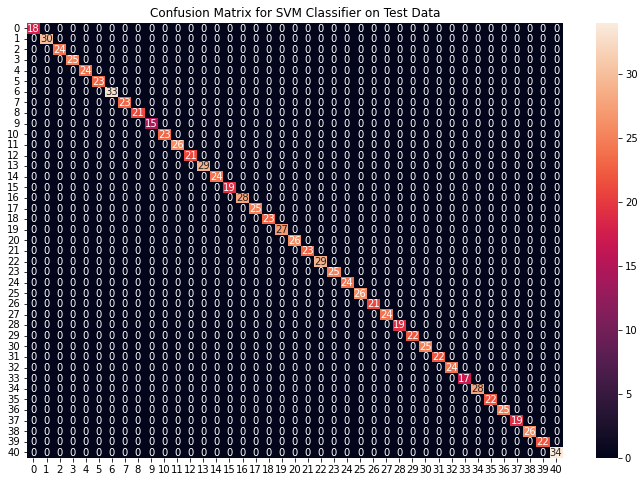

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


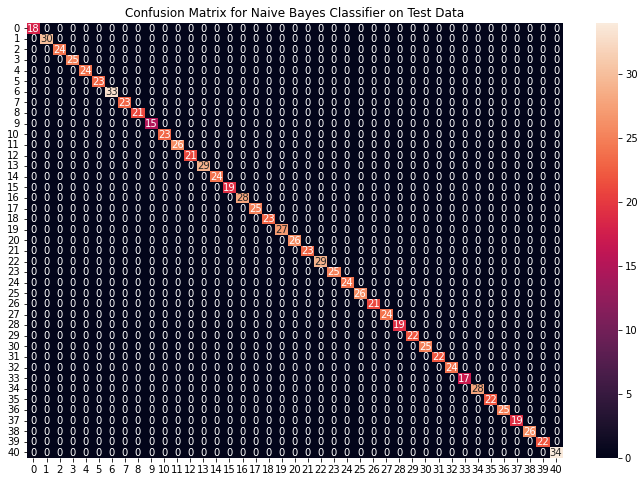

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


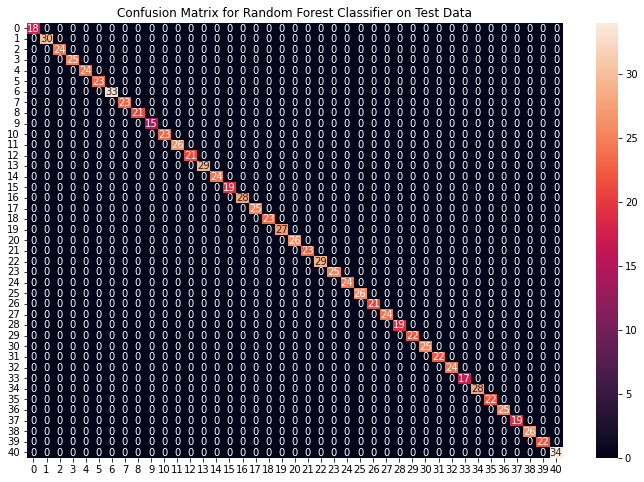

In [14]:
# Training and testing SVM Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

# Training and testing Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")

print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

# Training and testing Random Forest Classifier
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

Accuracy on Test dataset by the combined model: 100.0


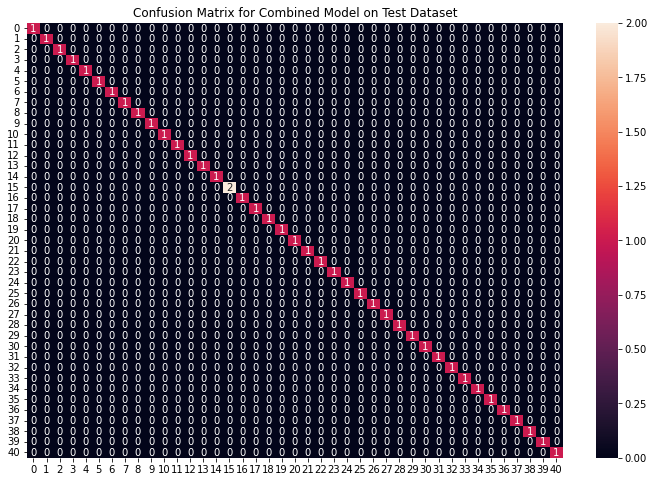

In [15]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("dataset/Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [mode([i,j,k])[0][0] for i,j,
			k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_Y, final_preds)*100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [16]:
# Creating a function that can take symptoms as input and generate predictions dictionary as output
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commmas
# Output: Generated predictions by models
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    
    # creating input data for the models
    input_data = [0] * len(data_dict["symptom_index"])
    for symptom in symptoms:
        index = data_dict["symptom_index"][symptom]
        input_data[index] = 1
        
    # reshaping the input data and converting it
    # into suitable format for model predictions
    input_data = np.array(input_data).reshape(1,-1)
    
    # generating individual outputs
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]

    # making final prediction by taking mode of all predictions
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": nb_prediction,
        "final_prediction":final_prediction
    }
    return predictions

# Testing the function
print(predictDisease("Itching"))

{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


C:\Users\Diksh\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Diksh\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\Diksh\sample_project_1\env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [17]:
# Saving Model using Pickle
import pickle

# Saving model 
pickle.dump(final_svm_model, open('saved_final_svm_model.pkl', 'wb'))
pickle.dump(final_nb_model, open('saved_final_nb_model.pkl', 'wb'))
pickle.dump(final_rf_model, open('saved_final_rf_model.pkl', 'wb'))

In [20]:
# Loading Model From Pickle 
final_svm_model = pickle.load(open('saved_final_svm_model.pkl', 'rb'))
print(final_svm_model.score(X_test, y_test)*100, '%')

100.0 %
